<h3>2.1 Load the week2.csv file into a dataframe. What is the type of the Date column? Make sure it is of type datetime64. Convert the Date column to the index of the dataframe.
Plot the closing price of each of the days for the entire time frame to get an idea of what the general outlook of the stock is.</h3>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('week2.csv')

In [3]:
df.set_index('Date',inplace=True)
df.index = pd.to_datetime(df.index)

Text(0.5,0,'Date')

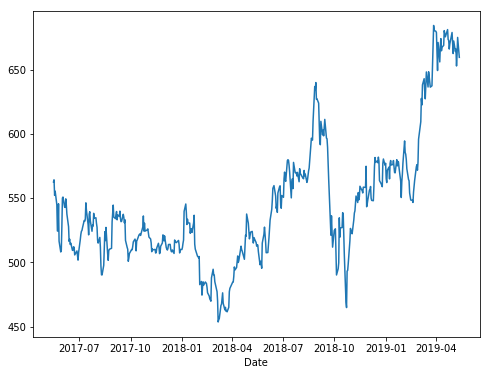

In [4]:
plt.figure(figsize=(8, 6))
plt.plot(df.index,df['Close Price'])
plt.xlabel('Date')

<h3>2.2 A stem plot is a discrete series plot, ideal for plotting daywise data. It can be plotted using the plt.stem() function.</h3>

Text(0.5,0,'Date')

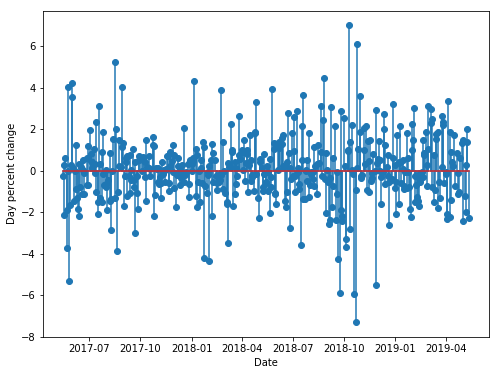

In [5]:
plt.figure(figsize=(8, 6))
plt.ylabel('Day percent change')
plt.stem(df.index,df['Day_Perc_Change'])
plt.xlabel('Date')

<h3>2.3 Plot the daily volumes as well and compare the percentage stem plot to it.</h3>

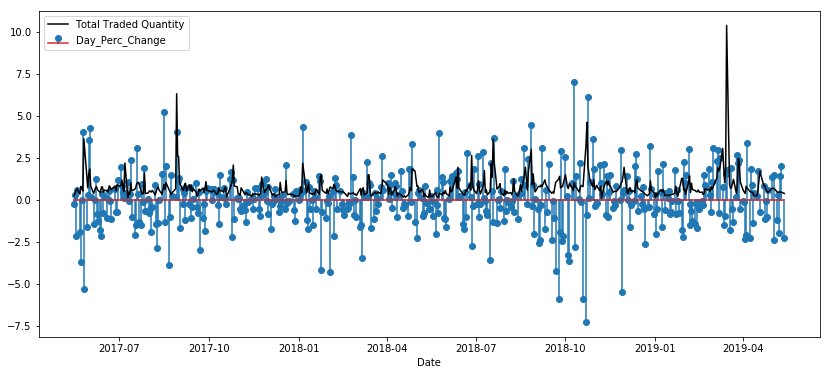

In [6]:
plt.figure(figsize=(14, 6))
plt.stem(df.index,df['Day_Perc_Change'],label='Day_Perc_Change')
plt.plot(df.index,df['Total Traded Quantity']/2000000 ,color='black',label='Total Traded Quantity')
plt.xlabel('Date')
plt.legend()

<h3>2.4 We had created a Trend column in module 1. We want to see how often each Trend type occurs. This can be seen as a pie chart, with each sector representing the percentage of days each trend occurs. Plot a pie chart for all the 'Trend' to know about relative frequency of each trend. You can use the groupby function with the trend column to group all days with the same trend into a single group before plotting the pie chart. From the grouped data, create a BAR plot of average & median values of the 'Total Traded Quantity' by Trend type. </h3>

Text(0,0.5,'Trend')

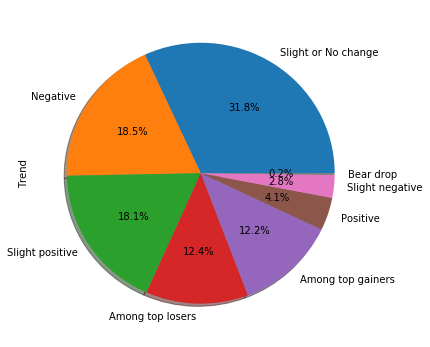

In [7]:
plt.figure(figsize=(6,6))
plt.pie(df['Trend'].value_counts(normalize=True) * 100,labels=df['Trend'].unique(),autopct='%1.1f%%',shadow=True)
plt.ylabel('Trend')

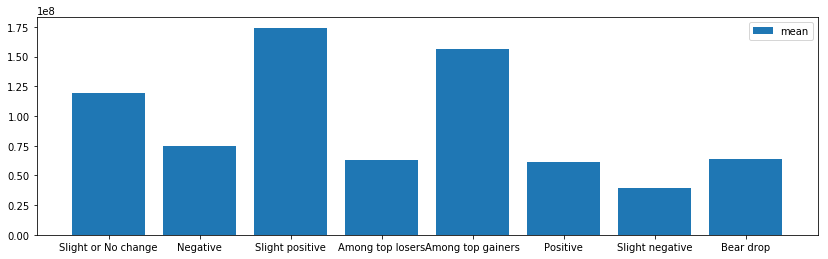

In [8]:
g = df.groupby('Trend')
plt.figure(figsize=(14,4))
plt.bar(df['Trend'].unique(), g.describe().transpose().mean(),label='mean')
plt.legend()

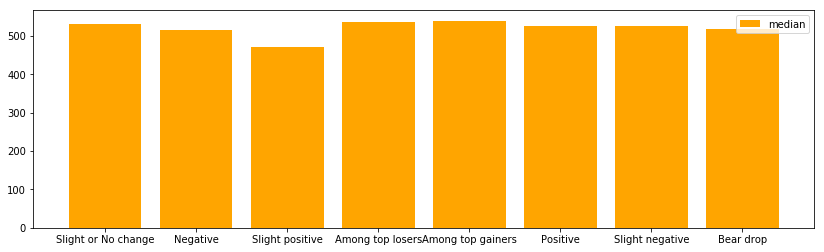

In [9]:
plt.figure(figsize=(14,4))
plt.bar(df['Trend'].unique(), g.describe().transpose().median(),label='median',color='orange')
plt.legend()

<h3>2.5 Plot the daily return (percentage) distribution as a histogram</h3>

(array([  3.,   2.,  10.,  44., 159., 188.,  60.,  21.,   4.,   2.]),
 array([-7.28116973, -5.85370308, -4.42623643, -2.99876979, -1.57130314,
        -0.14383649,  1.28363016,  2.71109681,  4.13856345,  5.5660301 ,
         6.99349675]),
 <a list of 10 Patch objects>)

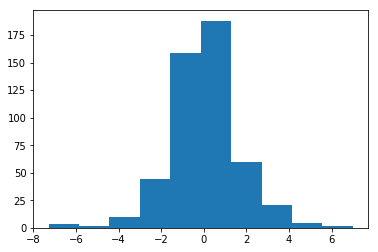

In [10]:
plt.hist(df['Day_Perc_Change'])

<h3>2.6 We next want to analyse how the behaviour of different stocks are correlated. The correlation is performed on the percentage change of the stock price instead of the stock price. 

Load any 5 stocks of your choice into 5 dataframes. Retain only rows for which ‘Series’ column has value ‘EQ’. Create a single dataframe which contains the ‘Closing Price’ of each stock. This dataframe should hence have five columns. Rename each column to the name of the stock that is contained in the column. Create a new dataframe which is a percentage change of the values in the previous dataframe. Drop Nan’s from this dataframe.
Using seaborn, analyse the correlation between the percentage changes in the five stocks. This is extremely useful for a fund manager to design a diversified portfolio. To know more, check out these resources on correlation and diversification. </h3>

In [11]:
Ashoka = pd.read_csv("ASHOKA.csv")
BajajElec = pd.read_csv("BAJAJELEC.csv")
BomDey = pd.read_csv("BOMDYEING.csv")
Centuryply = pd.read_csv("CENTURYPLY.csv")
Fortis = pd.read_csv("FORTIS.csv")

In [12]:
Ashoka[Ashoka['Series'] == 'EQ']
BajajElec[BajajElec['Series'] == 'EQ']
BomDey[BomDey['Series'] == 'EQ']
Centuryply[Centuryply['Series'] == 'EQ']
Fortis[Fortis['Series'] == 'EQ']

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,FORTIS,EQ,15-May-2017,208.40,208.40,209.65,204.05,206.75,205.25,205.66,9078354,1.867055e+09,24607,5980115,65.87
1,FORTIS,EQ,16-May-2017,205.25,206.25,209.45,205.45,207.70,207.90,207.86,2146212,4.461109e+08,15071,1127662,52.54
2,FORTIS,EQ,17-May-2017,207.90,208.00,210.80,204.90,205.30,205.90,208.01,3032479,6.307854e+08,21453,1609171,53.06
3,FORTIS,EQ,18-May-2017,205.90,204.00,205.25,195.00,195.80,196.85,200.05,2852401,5.706199e+08,18709,1337328,46.88
4,FORTIS,EQ,19-May-2017,196.85,197.80,204.90,196.45,204.20,203.55,200.95,4144993,8.329173e+08,37949,1424440,34.37
5,FORTIS,EQ,22-May-2017,203.55,206.00,206.25,193.50,195.40,194.80,198.74,3379385,6.716314e+08,25848,1700659,50.32
6,FORTIS,EQ,23-May-2017,194.80,195.50,199.00,191.20,196.95,196.55,196.18,3746973,7.350809e+08,29372,2086212,55.68
7,FORTIS,EQ,24-May-2017,196.55,197.65,200.20,192.50,194.50,194.35,196.82,2471551,4.864562e+08,24620,1254518,50.76
8,FORTIS,EQ,25-May-2017,194.35,192.50,203.50,192.10,202.50,202.55,199.13,2337720,4.655025e+08,16209,666465,28.51
9,FORTIS,EQ,26-May-2017,202.55,205.10,206.25,201.75,202.75,202.75,204.18,2141143,4.371788e+08,14747,855686,39.96


In [13]:
close_price = pd.concat([Ashoka['Close Price'],BajajElec['Close Price'],BomDey['Close Price'],Centuryply['Close Price'],Fortis['Close Price']],axis=1,keys=['ASHOKA', 'BAJAJELEC','BOMDYEING','CENTURYPLY','FORTIS'])

In [14]:
close_price= pd.DataFrame(close_price)

In [15]:
close_price.drop(0,axis=0,inplace=True)

In [16]:
close_price.drop(494,axis=0,inplace=True)

In [17]:
per_change = pd.concat([Ashoka['Close Price'].pct_change() *100,BajajElec['Close Price'].pct_change() *100,BomDey['Close Price'].pct_change() *100,Centuryply['Close Price'].pct_change() *100,Fortis['Close Price'].pct_change() *100],axis=1,keys=['ASHOKA', 'BAJAJELEC','BOMDYEING','CENTURYPLY','FORTIS'])

In [18]:
per_change.drop(0,axis=0,inplace=True)

In [19]:
per_change.drop(494,inplace=True)

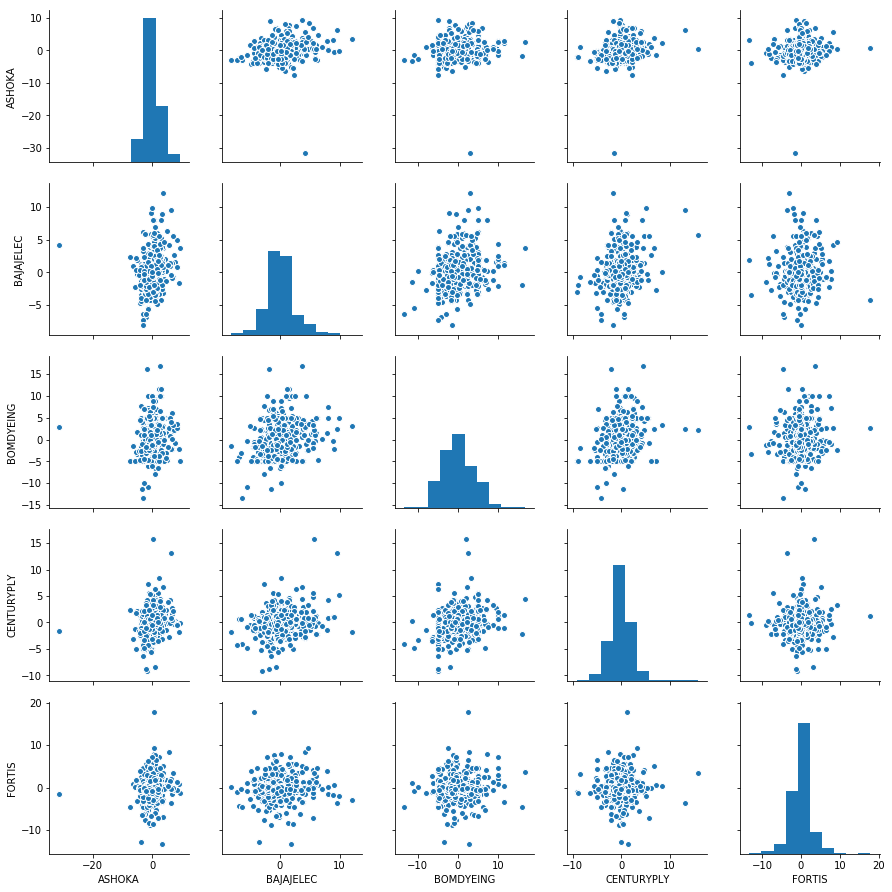

In [20]:
sns.pairplot(per_change)

<h3>2.7 Volatility is the change in variance in the returns of a stock over a specific period of time.Do give the following documentation on volatility a read.</h3>

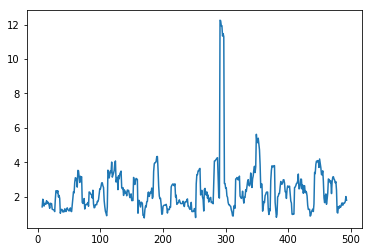

In [21]:
plt.plot(per_change['ASHOKA'].rolling(7).std())

<h3>2.8 Calculate the volatility for the Nifty index and compare the 2. This leads us to a useful indicator known as 'Beta'</h3>

In [22]:
Nifty = pd.read_csv('Nifty50/Nifty50.csv')

In [23]:
Nifty.drop(0,axis=0,inplace=True)

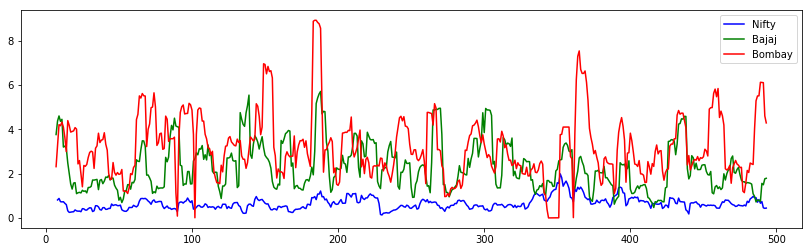

In [24]:
plt.figure(figsize=(14,4))
plt.plot(Nifty.index,(Nifty['Close'].pct_change()*100).rolling(7).std(),label='Nifty',color='blue')
plt.plot(per_change.index,per_change['BAJAJELEC'].rolling(7).std(),label='Bajaj',color='green')
plt.plot(per_change.index,per_change['BOMDYEING'].rolling(7).std(),label='Bombay',color='red')
plt.legend()

<h3>2.9 Trade Calls - Using Simple Moving Averages</h3>

In [27]:
Nifty.set_index('Date',inplace=True)
Nifty.index = pd.to_datetime(Nifty.index)

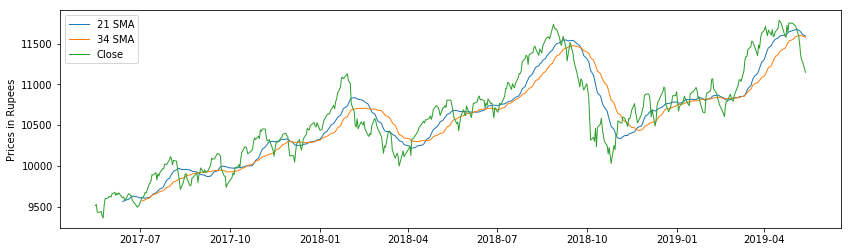

In [28]:
plt.figure(figsize=(14,4))
plt.plot(Nifty['Close'].rolling(21).mean(),label='21 SMA',lw=1)
plt.plot(Nifty['Close'].rolling(34).mean(),label='34 SMA',lw=1)
plt.plot(Nifty['Close'],lw=1)
plt.ylabel('Prices in Rupees')
plt.legend()

<h3>2.10 Trade Calls - Using Bollinger Bands 
Plot the bollinger bands for this stock - the duration of 14 days and 2 standard deviations away from the average</h3> 

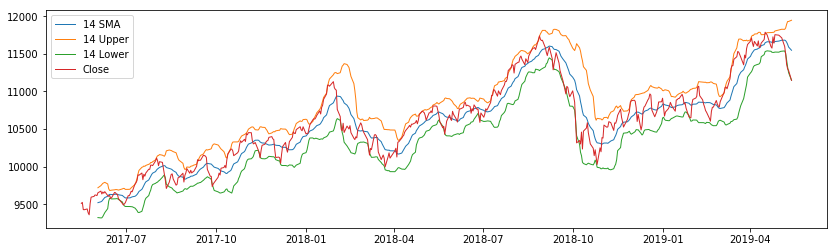

In [38]:
plt.figure(figsize=(14,4))
plt.plot(Nifty['Close'].rolling(14).mean(),label='14 SMA',lw=1)
plt.plot(Nifty['Close'].rolling(14).mean()+Nifty['Close'].rolling(14).std()*2,label='14 Upper',lw=1)
plt.plot(Nifty['Close'].rolling(14).mean()-Nifty['Close'].rolling(14).std()*2,label='14 Lower',lw=1)
plt.plot(Nifty['Close'],lw=1)
plt.legend()